# Proyecto

## Instrucciones

1.- Completa los datos personales (nombre y rol USM) de cada integrante en siguiente celda.


* __Nombre-Rol__:

 * Jacson Aravena - 201510506-5
 * Pablo Calcumil - 201673563-1
 * Javier Pizarro - 201510520-0
 * Fabián Rubilar - 201510509-K 
 * Martin Saieh - 201510527-8

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Sistemas de recomendación



![rgb](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

### Introducción

El rápido crecimiento de la recopilación de datos ha dado lugar a una nueva era de información. Los datos se están utilizando para crear sistemas más eficientes y aquí es donde entran en juego los sistemas de recomendación. Los sistemas de recomendación son un tipo de sistemas de filtrado de información, ya que mejoran la calidad de los resultados de búsqueda y proporcionan elementos que son más relevantes para el elemento de búsqueda o están relacionados con el historial de búsqueda del usuario.

Se utilizan para predecir la calificación o preferencia que un usuario le daría a un artículo. Casi todas las grandes empresas de tecnología los han aplicado de una forma u otra: Amazon lo usa para sugerir productos a los clientes, YouTube lo usa para decidir qué video reproducir a continuación en reproducción automática y Facebook lo usa para recomendar páginas que me gusten y personas a seguir. Además, empresas como Netflix y Spotify dependen en gran medida de la efectividad de sus motores de recomendación para sus negocios y éxitos.

### Objetivos

Poder realizar un proyecto de principio a fin ocupando todos los conocimientos aprendidos en clase.  Para ello deben cumplir con los siguientes objetivos:

* **Desarrollo del problema**: Se les pide a partir de los datos, proponer al menos un tipo de sistemas de recomendación. Como todo buen proyecto de Machine Learning deben seguir el siguiente procedimiento:
 * **Lectura de los datos**: Describir el o los conjunto de datos en estudio.
 * **Procesamiento de los datos**: Procesar adecuadamente los datos en estudio. Para este caso ocuparan técnicas de [NLP](https://en.wikipedia.org/wiki/Natural_language_processing).
 * **Metodología**: Describir adecuadamente el procedimiento ocupado en cada uno de los modelos ocupados.
 * **Resultados**: Evaluar adecuadamente cada una de las métricas propuesta en este tipo de problemas.
 
 
* **Presentación**: La presentación será levemente distinta a las anteriores, puesto que deberán ocupar la herramienta de Jupyter llamada [RISE](https://en.wikipedia.org/wiki/Natural_language_processing). Esta presentación debe durar aproximadamente entre 15-30 minutos, y deberán mandar sus videos (por youtube, google drive, etc.)

### Evaluación

* **Códigos**: Los códigos deben estar correctamente documentados (ocupando las *buenas prácticas* de python aprendidas en este curso).
* **Explicación**: La explicación de la metodología empleada debe ser clara, precisa y concisa.
* **Apoyo Visual**: Se espera que tengan la mayor cantidad de gráficos y/o tablas que puedan resumir adecuadamente todo el proceso realizado.



 


### Esquema del proyecto

El proyecto tendrá la siguiente estructura de trabajo:

```
- project
|
|- data
    |- tmdb_5000_credits.csv
    |- tmdb_5000_movies.csv
|- graficos.py
|- lectura.py
|- modelos.py
|- preprocesamiento.py
|- presentacion.ipynb
|- project.ipynb

```

donde:

* `data`: carpeta con los datos del proyecto
* `graficos.py`: módulo de gráficos 
* `lectura.py`: módulo de lectura de datos
* `modelos.py`: módulo de modelos de Machine Learning utilizados
* `preprocesamiento.py`: módulo de preprocesamiento de datos
* `presentacion.ipynb`: presentación del proyecto (formato *RISE*)
* `project.ipynb`: descripción del proyecto

In [ ]:
#Cargar Libreria
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se llaman a los datos
credits = pd.read_csv(os.path.join("data","tmdb_5000_credits.csv"), sep=",")
movies=pd.read_csv(os.path.join("data","tmdb_5000_movies.csv"), sep=",")

Para comprender un poco sobre los datos que estamos usando, haremos una descripción general de
los DataFrame respectivos:

Descripción del Dataframe `Credits`:

* `movie_id`: Id de la película.
* `title`: Titulo de la película.
* `cast`: Información de cada personaje de la película en un diccionario.
* `crew`: Información de las personas que hicieron la producción de la película en un diccionario.

Descripción del Dataframe `Movies`:

* `budget`: Presupuesto para la producción de la película.
* `genres`: Genero de la película.
* `homepage`: Página web de la película.
* `id`:Id de la película.
* `keywords`: Características de la película.
* `original_language`: Idioma de la película.
* `original_title`: El título de la película antes de la traducción o adaptación.

* `original_title`: El título de la película antes de la traducción o adaptación.
* `overview`: Descripción general de la película.
* `popularity`: Popularidad de la película.
* `production_companies`: Compañias productoras de la película.
* `production_countries`: País o países donde se filmó de la película.
* `release_date`: Fecha de lanzamiento de la película.
* `revenue`: Ingresos de la película.

* `runtime`: Duración de la película.
 

Los DataFrame tienen en común la columna `id`, por lo tanto, procederemos a unir los conjuntos
de datos en un solo DataFrame llamado `df`.

In [ ]:
credits = credits.rename(columns={'movie_id':'id'})
df = pd.merge(credits, movies, on='id')
df = df.drop(['title_x'],axis=1)
df = df.rename(columns={'title_y':'title'})

In [ ]:
df.head(3)

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
df.dtypes

id                        int64
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Se identifica la película de `id = 4553` con problemas, pues no contiene nada de información.

In [ ]:
df=df.drop([4553],axis=0)
df[df['release_date'].isnull()]

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


Se agrega la columna `year` que indica la fecha de lanzamiento de la pelicula.

In [ ]:
year = [str(anho)[0:4] for anho in list(df['release_date'].values)]
df['year'] = year
df['year']=df['year'].astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler

df_nums = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
transform = StandardScaler().fit_transform(df_nums)

df_normalizado = pd.DataFrame(transform, columns = df_nums.columns)


<AxesSubplot:>

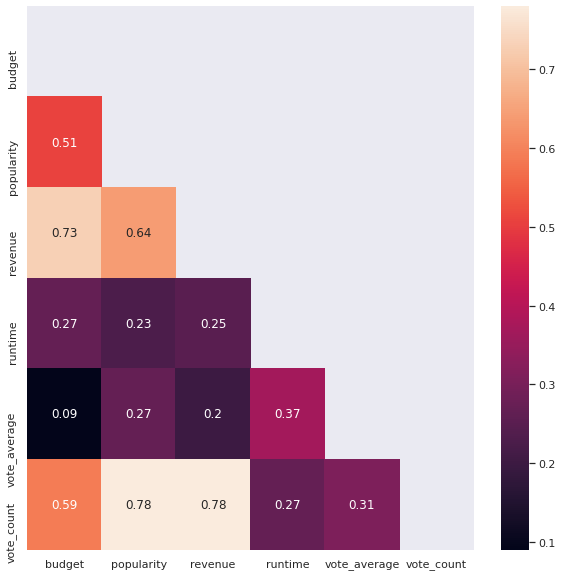

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=1)
mask = np.triu(np.ones_like(df_normalizado.corr(), dtype = bool))
sns.heatmap(df_normalizado.corr().round(2), #Redondeo
            mask = mask,
            annot = True, fmt = 'g')

## Filtración demográfica

Necesitamos un tipo de Score que califique las películas e identifique las mejores según las reacciones de las personas. Un indicador 
claro podría ser `vote_average`, sin embargo, puede ser no representativo para aquellas peliculas que tienen pocos votos. Se propone utilizar un
indicador ponderado, definido por:

$$ WS = R(\frac{v}{v+m})+C(\frac{m}{v+m}) $$

donde $v$ corresponde al número de votos para la pelicula, $m$ es el mínimo de votos requeridos para ser candidato, $R$ es la valorización promedio que tiene la pelicula
y $C$ es el promedio de los votos promedio de todas las peliculas.

Ahora procedemos a calculas las variables que necesitamos para trabajar con el indicador
ponderado:

In [ ]:
C = df['vote_average'].mean() #peliculas tienen en promedio nota 6
print('El valor de C es:',C)

El valor de C es: 6.0934402332361515


Así vemos que la nota media para todas las películas tiene un valor aproximado de $6.1$ en
una escala de $1$ a $10$. 

Luego, hay que calcular un valor para `m`, que se define como los votos mínimos para aparecer 
en la tabla de datos. Para esto, es sensato usar el percentil $90$ como límite. Esto es, para 
que una película aparezca en la lista, debe tener más votos que al menos el $90\%$ de todas
las películas. 


In [ ]:
m = df['vote_count'].quantile(0.9) #se busca filtrar peliculas que tengan menos votos que el 90% de las peliculas en la lista
print('El valor de m es:', m)

El valor de m es: 1839.2000000000044


Por lo tanto, ahora podemos filtrar las películas que califican según el criterio respectivo.

In [ ]:
q_movies = df.copy().loc[ df['vote_count'] >= m]
q_movies.shape

(481, 23)

Ahora, necesitamos calcular una métrica para cada unas de las $481$ películas seleccionadas.
Para esto, definimos una función `ws`.

In [ ]:
def ws(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ( v/(v+m) )*R + (m/(m+v))*C

Definimos una nueva columna en `q_movies` de nombre `score`, con su respectivo score `ws` 
para luego ordenar nuevamente los datos en base a dicho valor. Luego, clasificamos el
DataFrame según la función de puntuación y se procede a generar título, recuento de votos, 
promedio de votos y la clasificación ponderada de las mejores películas.

In [ ]:
q_movies['score'] = q_movies.apply(ws,axis=1)
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[ ['title','vote_count','vote_average','score'] ].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059333
662,Fight Club,9413,8.3,7.939332
65,The Dark Knight,12002,8.2,7.920083
3232,Pulp Fiction,8428,8.3,7.904731
96,Inception,13752,8.1,7.863298
3337,The Godfather,5893,8.4,7.851356
95,Interstellar,10867,8.1,7.809554
809,Forrest Gump,7927,8.2,7.803286
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727346
1990,The Empire Strikes Back,5879,8.2,7.698020


Pero hay que observar que también hay otras opciones, por ejemplo, ee podría agregar a esta 
lista, películas ordenadas también por su popularidad.

In [ ]:
q_movies.sort_values('popularity',axis=0,ascending=False)[ ['title','vote_count','vote_average','score','popularity'] ].head(10)

,title,vote_count,vote_average,score,popularity
546,Minions,4571,6.4,6.312043,875.581305
95,Interstellar,10867,8.1,7.809554,724.247784
788,Deadpool,10995,7.4,7.212764,514.569956
94,Guardians of the Galaxy,9742,7.9,7.613102,481.098624
127,Mad Max: Fury Road,9427,7.2,7.019355,434.278564
28,Jurassic World,8662,6.5,6.428794,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.206835,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,6.944898,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.474493,206.227151
88,Big Hero 6,6135,7.8,7.406393,203.734590


## Filtro de Estrenos

Se puede aplicar el filtro anterior después de aplicar un filtro por año para determinar los mejores estrenos. Considerando que la película más reciente es del 2017, se considerarán estrenos todas aquellas películas del 2015 en adelante.

In [ ]:
estrenos = q_movies[ q_movies['year']>=2015 ]
estrenos = estrenos[['title','vote_count','vote_average','score','popularity','year']].sort_values('score',axis=0, ascending=False)
estrenos.head(10)

,title,vote_count,vote_average,score,popularity,year
77,Inside Out,6560,8.0,7.582514,128.655964,2015
2760,Room,2757,8.1,7.297062,66.113340,2015
270,The Martian,7268,7.6,7.295750,167.932870,2015
788,Deadpool,10995,7.4,7.212764,514.569956,2016
2752,Ex Machina,4737,7.6,7.178653,95.130041,2015
684,The Hateful Eight,4274,7.6,7.146741,68.717016,2015
2123,Spotlight,2686,7.8,7.106394,41.503588,2015
7,Avengers: Age of Ultron,6767,7.3,7.042150,134.279229,2015
176,The Revenant,6396,7.3,7.030534,100.635882,2015
127,Mad Max: Fury Road,9427,7.2,7.019355,434.278564,2015


## Filtro basado en contenido

Suponemos hay $3$ películas de distinto género y trama, pero que tienen similares elencos, 
directores, etc. Entonces, si a una persona le gusta una de esas peliculas, se le debería 
recomendar las $2$ restantes. Se puede generalizar a más películas y aplicar ciertos filtros 
que garanticen una recomendación exitosa y que sea adecuada a los gustos de cada persona.

#### Recomendación basada en el resumen de las películas

In [ ]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Cualquiera de ustedes que haya procesado un poco el texto antes sabe que debemos convertir 
el vector de palabras de cada descripción general. Ahora calcularemos los vectores de 
frecuencia de documento inversa de término (TF-IDF) para cada descripción general. 
Ahora, si se preguntan qué es frecuencia de término , es la frecuencia relativa de una palabra 
en un documento y se da como instancias de término/instancias totales. La frecuencia inversa 
del documento es el recuento relativo de los documentos que contienen el término, se da como 
log(número de documentos/documentos con plazo). La importancia general de cada palabra para los 
documentos en los que aparecen es igual a TF * IDF.

Esto le dará una matriz donde cada columna representa una palabra en el vocabulario general 
(todas las palabras que aparecen en al menos un documento) y cada fila representa una 
película. Esto se hace para reducir la importancia de las palabras que se producen 
con frecuencia en vistas generales de la trama y, por lo tanto, su importancia en el cálculo 
de la puntuación de similitud final. Afortunadamente, scikit-learn te ofrece una clase 
TfIdfVectorizer integrada que produce la matriz TF-IDF en un par de líneas.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remueve las palabras en ingles 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Reemplaza NaN's con string vacios
df['overview'] = df['overview'].fillna('')
#Se construye la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Retorno de tfidf_matrix (.shape)
tfidf_matrix.shape

(4802, 20977)

Vemos que se utilizaron más de $21.000$ palabras diferentes para describir las $4803$ películas 
de nuestro conjunto de datos.

Con esta matriz, podemos calcular una puntuación de similitud. Hay varios  candidatos para esto;
como las puntuaciones de similitud euclidiana, de Pearson y del coseno. Usaremos la similitud 
del coseno para calcular una cantidad numérica que denota la similitud entre dos películas. 
Usamos la puntuación de similitud de coseno, ya que, es independiente de la magnitud y es 
relativamente fácil y rápida de calcular. Matemáticamente, se define de la siguiente manera:

$\cos (\theta) = \mathbf{A}\cdot \mathbf{B} (\left \| \mathbf{A} \right \|\left \| \mathbf{B} \right \|)^{-1} = \sum_{i=0}^{n}A_{i}B_{i}(\sqrt{\sum_{i=0}^{n}A_{i}^{2}} \sqrt{\sum_{i=0}^{n}B_{i}^{2}})^{-1}$

Ahora, usaremos linear_kernel () de sklearn en lugar de cosine_similarities(), ya que, es más 
rápido.



In [ ]:
# Importa linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Calcula matriz de coseno-similitud
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Vamos a definir una función que toma el título de una película como entrada y genera una lista 
de las $10$ películas más similares. Para esto, necesitamos identificar el índice de una 
película en nuestro DataFrame dado su título.


In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

Para definir la función de recomendaciones, seguiremos los siguientes pasos:

* `Paso 1`: Obtener el índice de la película dado su título.
* `Paso 2`: Obtener la lista de puntuaciones de similitud de coseno para esa película en 
particular con todas las películas. Luego, obtener una lista de tuplas  donde el primer 
elemento es su posición y el segundo es la puntuación de similitud.
* `Paso 3`: Ordenar la lista de tuplas en función de las puntuaciones de similitud.
* `Paso 4`: Obtener los $10$ elementos principales de esta lista.
* `Paso 5`: Devuelve los títulos correspondientes a los índices de los elementos superiores.



In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    #Obtiene el índice de la película que coincide con el título
    idx = indices[title]

    #Obtiene las puntuaciones de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Ordena las películas según las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Obtiene las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]

    #Obtiene los índices de películas
    movie_indices = [i[0] for i in sim_scores]

    #Devuelve el top 10 de películas más similares
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Pulp Fiction')

3526            The Sting
3194       All or Nothing
3466        Sliding Doors
4624            Locker 13
2917          The Fighter
4036            Antibirth
3491         The Wackness
2849             Nebraska
3504                11:14
3346    Jumping the Broom
Name: title, dtype: object

El sistema de recomendación creado cumple con su función de encontrar películas con descripciones
similares. Pero si tenemos una saga de películas, como The Avengers, Batman, Spider Man, entre 
otras, el sistema de recomendación retornaría toda la saga, pero quizás las personas buscan 
películas similares en cuanto a los directores, género o alguna otra característica.



#### Recomendación basada en créditos, géneros, y palabras clave

Vamos a construir un recomendador basado en los siguientes datos: `3 actores principales`, 
`Director`, `Géneros relacionados` y las `Palabras clave` de la trama de la película.

In [ ]:
# Analizamos las características en cadena 
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Devuelve los 3 elementos principales de la lista o la lista completa.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Compruebe si existen más de 3 elementos. En caso afirmativo, devuelva solo los tres primeros. Si no, devuelva la lista completa..
        if len(names) > 3:
            names = names[:3]
        return names

    #Devuelve una lista vacía en caso de datos faltantes o mal formados.
    return []

In [ ]:
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [ ]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


El siguiente paso sería convertir los nombres y las instancias de palabras clave en minúsculas 
y eliminar todos los espacios entre ellos. Esto se hace para que nuestro sistema no cuente 
Johnny de "Johnny Depp" y "Johnny Galecki" como el mismo.

In [ ]:
#Función que convierte todos los string a minúsculas
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Compruebe si existe el director. Si no, devuelve un string vacío
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
#Aplica la función clean_data.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

Ahora estamos en condiciones de crear una cadena de datos que contiene todos los metadatos 
que queremos alimentar a nuestro vectorizador (a saber, actores, director y palabras clave).

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)


Los siguientes pasos son los mismos que hicimos con nuestro recomendador basado en la 
descripción de la trama.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4637    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [ ]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4637    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

Vemos que nuestro recomendador ha logrado capturar más información debido a más características 
y nos ha dado mejores recomendaciones. Es más probable que a los fanáticos de Marvel o DC les 
gusten las películas de la misma casa de producción. Por lo tanto, a nuestras características 
anteriores podemos agregar `production_company`.


### Apoyo

Para que la carga del proyecto sea lo más amena posible, se les deja las siguientes referencias:

* **Sistema de recomendación**: Pueden tomar como referencia el proyecto de Kaggle [Getting Started with a Movie Recommendation System](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data?select=tmdb_5000_credits.csv). 
*  **RISE**: Les dejo un video del Profesor Sebastían Flores denomindo *Presentaciones y encuestas interactivas en jupyter notebooks y RISE* ([link](https://www.youtube.com/watch?v=ekyN9DDswBE&ab_channel=PyConColombia)). Este material les puede ayudar para comprender mejor este nuevo concepto.